In [4]:
!pip install scikit-fuzzy

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [6]:

# Create the fuzzy input variables
hunger_level = ctrl.Antecedent(np.arange(0, 11, 1), 'hunger_level')
time_since_last_feeding = ctrl.Antecedent(np.arange(0, 11, 1), 'time_since_last_feeding')

In [7]:

# Create the fuzzy output variable
food_dispensed = ctrl.Consequent(np.arange(0, 101, 1), 'food_dispensed')


In [8]:

# Define membership functions for hunger level
hunger_level['low'] = fuzz.trimf(hunger_level.universe, [0, 0, 5])
hunger_level['medium'] = fuzz.trimf(hunger_level.universe, [0, 5, 10])
hunger_level['high'] = fuzz.trimf(hunger_level.universe, [5, 10, 10])

In [9]:
# Define membership functions for time since last feeding
time_since_last_feeding['short'] = fuzz.trimf(time_since_last_feeding.universe, [0, 0, 5])
time_since_last_feeding['moderate'] = fuzz.trimf(time_since_last_feeding.universe, [0, 5, 10])
time_since_last_feeding['long'] = fuzz.trimf(time_since_last_feeding.universe, [5, 10, 10])

In [10]:

# Define membership functions for food dispensed
food_dispensed['low'] = fuzz.trimf(food_dispensed.universe, [0, 0, 50])
food_dispensed['medium'] = fuzz.trimf(food_dispensed.universe, [0, 50, 100])
food_dispensed['high'] = fuzz.trimf(food_dispensed.universe, [50, 100, 100])


In [11]:
# Define the rules
rule1 = ctrl.Rule(hunger_level['low'] & time_since_last_feeding['short'], food_dispensed['low'])
rule2 = ctrl.Rule(hunger_level['low'] & time_since_last_feeding['long'], food_dispensed['medium'])
rule3 = ctrl.Rule(hunger_level['high'] & time_since_last_feeding['short'], food_dispensed['medium'])
rule4 = ctrl.Rule(hunger_level['high'] & time_since_last_feeding['long'], food_dispensed['high'])
rule5 = ctrl.Rule(hunger_level['medium'] & time_since_last_feeding['moderate'], food_dispensed['medium'])

In [12]:
# Create the control system
food_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
food_feeder = ctrl.ControlSystemSimulation(food_ctrl)

In [13]:
# Example: Input hunger level and time since last feeding
food_feeder.input['hunger_level'] = 8  # High hunger level
food_feeder.input['time_since_last_feeding'] = 7  # Long time since last feeding





In [14]:
# Compute the result
food_feeder.compute()


In [15]:
# Output: Amount of food to be dispensed
print(f"Food dispensed: {food_feeder.output['food_dispensed']} grams")

Food dispensed: 54.8148148148149 grams


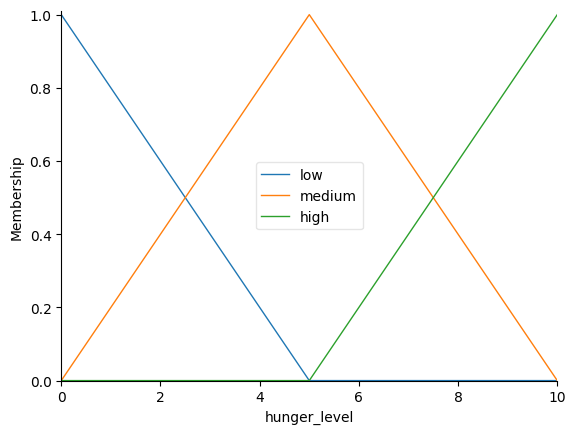

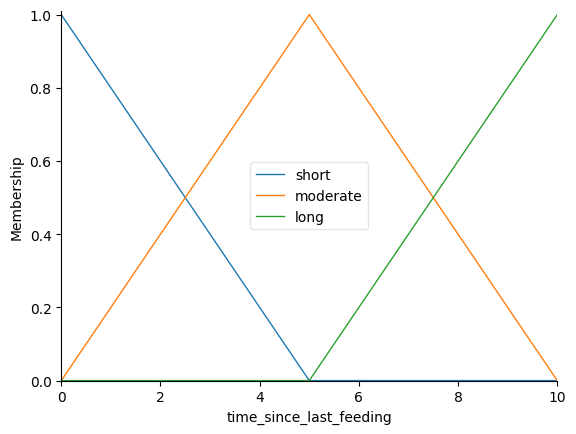

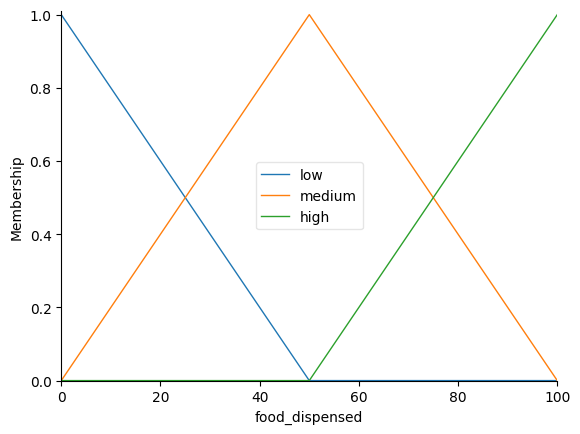

In [17]:
hunger_level.view()
time_since_last_feeding.view()
food_dispensed.view()

